# New York City Taxi Trip Duration Prediction

This project aims to predict the duration of the trip. Trip duration is predicted based on pick-up and drop-off datetime, pick-up and drop-off coordinates, number of passengers, vendors, and how the data record. Data source: https://www.kaggle.com/competitions/nyc-taxi-trip-duration/data

## Preparation

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

https://www.kaggle.com/competitions/nyc-taxi-trip-duration

### Load dataset

In [17]:
df= pd.read_csv('/content/Drive/MyDrive/dibimbing/Special Class 6/HW_data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


### Correcting data type

In [18]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [19]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

In [20]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['date'] = df['pickup_datetime'].dt.day
df['day'] = df['pickup_datetime'].dt.day_name()
df['hour'] = df['pickup_datetime'].dt.hour

In [ ]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,year,month,date,hour,day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016,3,14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016,6,12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016,1,19,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016,4,6,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016,3,26,13,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,0,778,2016,4,8,13,Friday
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,0,655,2016,1,10,7,Sunday
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,0,764,2016,4,22,6,Friday
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,0,373,2016,1,5,15,Tuesday


## Data Cleaning

### Handling Missing Value

In [21]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
year                  0
month                 0
date                  0
day                   0
hour                  0
dtype: int64

### Handling Duplicated Value

In [22]:
df.duplicated().sum()

0

## Data Understanding

### Multicollinearity Check

<AxesSubplot:>

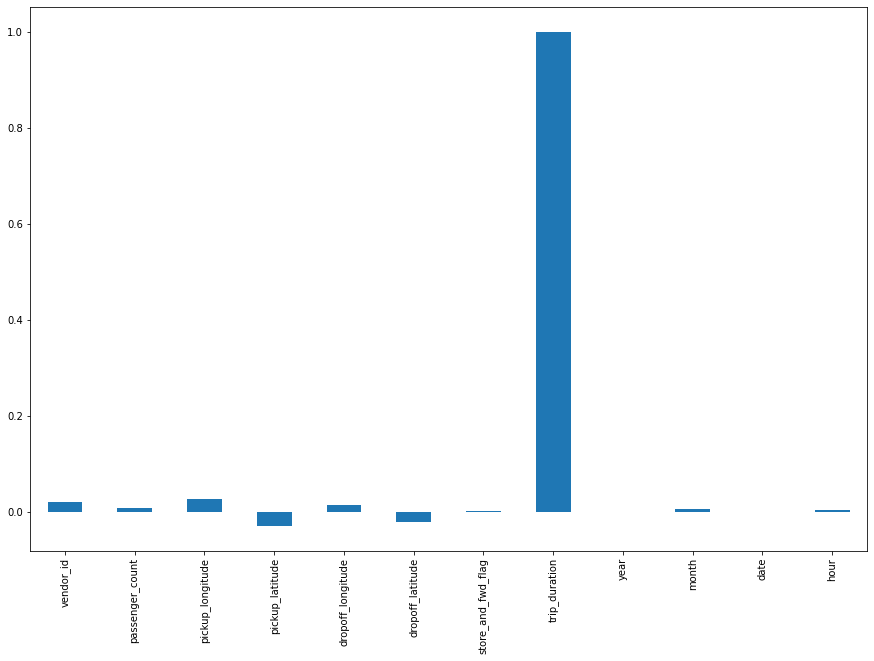

In [ ]:
df.corr()['trip_duration'].plot(kind='bar', figsize = (15, 10))

Korelasi sangat rendah antara feature dan target (trip duration)

### Seasonal Analysis

#### Year

In [ ]:
year = df.groupby(['year']).agg(
              number_of_order = ('id', 'nunique')).sort_values(
                ['year'], ascending=True).reset_index()
year.head()

,year,number_of_order
0,2016,1458644


#### Month

In [ ]:
month = df.groupby(['month']).agg(
              number_of_order = ('id', 'nunique'),
              trip_duration = ('trip_duration', 'mean')).sort_values(
                ['month'], ascending=True).reset_index()
month

,month,number_of_order,trip_duration
0,1,229707,922.373319
1,2,238300,920.830453
2,3,256189,937.365363
3,4,251645,962.891462
4,5,248487,999.450555
5,6,234316,1013.367226


<Axes: xlabel='month', ylabel='number_of_order'>

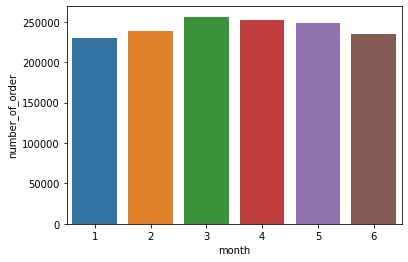

In [ ]:
sns.barplot(x='month', y='number_of_order', data=month)

<Axes: xlabel='month', ylabel='trip_duration'>

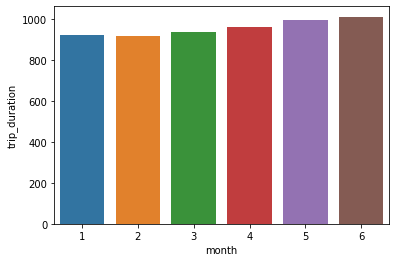

In [ ]:
sns.barplot(x='month', y='trip_duration', data=month)

#### Date

In [ ]:
date = df.groupby(['date']).agg(
              number_of_order = ('id', 'nunique'),
              trip_duration = ('trip_duration', 'mean')).sort_values(
                ['date'], ascending=True).reset_index()
date.head()

,date,number_of_order,trip_duration
0,1,46612,958.053978
1,2,47752,928.860299
2,3,47945,976.247221
3,4,49655,947.549451
4,5,50176,1020.272899


<Axes: xlabel='date', ylabel='number_of_order'>

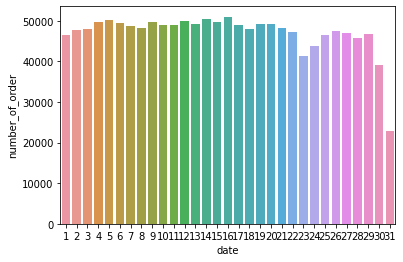

In [ ]:
sns.barplot(x='date', y='number_of_order', data=date)

<Axes: xlabel='date', ylabel='trip_duration'>

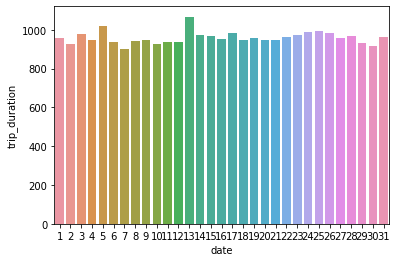

In [ ]:
sns.barplot(x='date', y='trip_duration', data=date)

#### Day

In [ ]:
day = df.groupby(['day']).agg(
              number_of_order = ('id', 'nunique'),
              trip_duration = ('trip_duration', 'mean')).sort_values(
                ['day'], ascending=True).reset_index()

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day['day'] = pd.Categorical(day['day'], categories=weekdays, ordered=True)
day = day.sort_values('day')

day.head()

,day,number_of_order,trip_duration
3,Sunday,195366,901.639395
1,Monday,187418,897.947839
5,Tuesday,202749,983.463124
6,Wednesday,210136,975.450494
4,Thursday,218574,1006.528654


<Axes: xlabel='day', ylabel='number_of_order'>

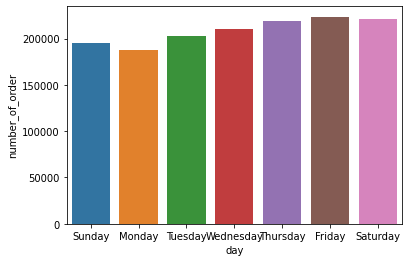

In [ ]:
sns.barplot(x='day', y='number_of_order', data=day)

<Axes: xlabel='day', ylabel='trip_duration'>

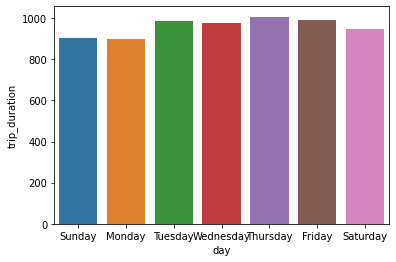

In [ ]:
sns.barplot(x='day', y='trip_duration', data=day)

#### Hour

In [ ]:
hour = df.groupby(['hour']).agg(
              number_of_order = ('id', 'nunique'),
              trip_duration = ('trip_duration', 'mean')).sort_values(
                ['hour'], ascending=True).reset_index()
hour.head()

,hour,number_of_order,trip_duration
0,0,53248,936.657302
1,1,38571,903.087112
2,2,27972,890.076934
3,3,20895,890.070878
4,4,15792,921.976444


<Axes: xlabel='hour', ylabel='number_of_order'>

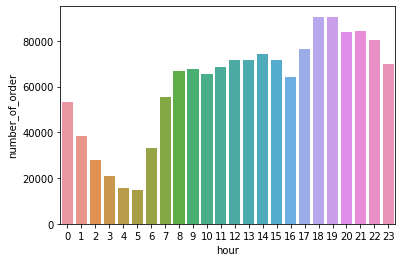

In [ ]:
sns.barplot(x='hour', y='number_of_order', data=hour)

<Axes: xlabel='hour', ylabel='trip_duration'>

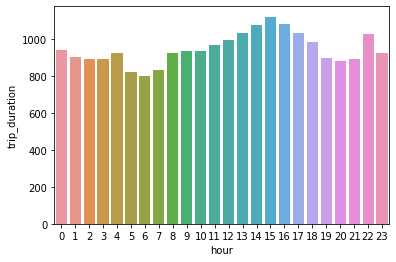

In [ ]:
sns.barplot(x='hour', y='trip_duration', data=hour)

Tidak ada perbedaan yang signifikan dari jenis bulan, tanggal, hari, dan jam

## Data Splitting

In [23]:
df = df.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'day'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('trip_duration', axis=1)
y = df[['trip_duration']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Modelling

In [14]:
def modeling(X_train, y_train, X_test, y_test):
  list_model = [
                  LinearRegression(),
                  Ridge(),
                  Lasso(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),  
                  GradientBoostingRegressor()  
                  ]

  result = pd.DataFrame(columns = ['Dataset', 'Method','RMSE', 'MAE', 'MAPE'])

  feature = X_train.copy()
  X_train = X_train.to_numpy()
  y_train = y_train.to_numpy()
  y_train = y_train.reshape(len(y_train),)

  for model in list_model:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_train)
      
      method = str(type(model)).split('.')[-1][:-2]

      RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
      MAE = mean_absolute_error(y_train, y_pred)
      MAPE = mean_absolute_percentage_error(y_train, y_pred)
      
      result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

      y_pred = model.predict(X_test)
      
      method = str(type(model)).split('.')[-1][:-2]

      RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
      MAE = mean_absolute_error(y_test, y_pred)
      MAPE = mean_absolute_percentage_error(y_test, y_pred)

      result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

  print(result)

In [25]:
modeling(X_train, y_train, X_test, y_test)

<ipython-input-14-bbfb18b926f2>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-14-bbfb18b926f2>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-14-bbfb18b926f2>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE

   Dataset                     Method          RMSE         MAE      MAPE
0    Train           LinearRegression   5741.161874  608.574563  1.611008
1     Test           LinearRegression   3255.859990  609.504725  1.577714
2    Train                      Ridge   5741.161876  608.576775  1.610992
3     Test                      Ridge   3255.859668  609.506902  1.577703
4    Train                      Lasso   5741.413727  609.771625  1.605381
5     Test                      Lasso   3255.987561  610.577245  1.573743
6    Train      DecisionTreeRegressor      2.373182    0.012164  0.000025
7     Test      DecisionTreeRegressor  11744.961827  588.171143  0.918651
8    Train      RandomForestRegressor   2264.591023  170.434333  0.282498
9     Test      RandomForestRegressor   4753.297655  464.531635  0.764127
10   Train  GradientBoostingRegressor   4462.701756  467.182251  1.170776
11    Test  GradientBoostingRegressor   3318.454664  473.508182  1.176628


<ipython-input-14-bbfb18b926f2>:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


Hasil model belum baik, nilai MAE cukup tinggi dan RMSE yang sangat tinggi. Nilai RMSE yang tinggi menunjukan banyaknya nilai prediksi yang outlier. Nilai absolut error 600 memiliki arti error prediksi sebesar 10 menit yang dimana error cukup besar